In [1]:
import pandas as pd
import scipy as sp
import numpy as np
import seaborn as sns

Let get the mean CP values over all units in the IC and CN for each tone duration. We also need to split units into eithier an increasing or decreasing group for plotting. 

In [2]:
CP_data_1 = sp.io.loadmat('../TIN_CP_data/1-46_CP_data.mat')
CP_data_2 = sp.io.loadmat('../TIN_CP_data/51-100_CP_data.mat')
CP_data_3 = sp.io.loadmat('../TIN_CP_data/101-166_CP_data.mat')
CP_data_4 = sp.io.loadmat('../TIN_CP_data/168-178_CP_data.mat')

In [3]:
Grand_CP_1 = CP_data_1.get('Grand_CP')
Grand_CP_2 = CP_data_2.get('Grand_CP')
Grand_CP_3 = CP_data_3.get('Grand_CP')
Grand_CP_4 = CP_data_4.get('Grand_CP')

In [4]:
p_values_1 = CP_data_1.get('p_values')
p_values_2 = CP_data_2.get('p_values')
p_values_3 = CP_data_3.get('p_values')
p_values_4 = CP_data_4.get('p_values')


In [6]:
p_values_1

array([[array([[0.1]]), array([[0.1]]), array([[0.1]]), array([[0.1]]),
        array([[0.1]]), array([[0.1]]), array([[0.1]]), array([[0.1]]),
        array([[0.1]]), array([[0.1]]), array([[0.1]]), array([[0.1]]),
        array([[0.1]]), array([[0.1]]), array([[0.1]]), array([[0.1]])],
       [array(['NA'], dtype='<U2'), array([[0.001]]), array([[0.001]]),
        array([[0.1]]), array([[0.001]]), array([[0.1]]), array([[0.1]]),
        array([[0.1]]), array([[0.1]]), array([[0.1]]), array([[0.1]]),
        array([[0.1]]), array([[0.1]]), array([[0.1]]), array([[0.1]]),
        array([[0.1]])],
       [array([[0.001]]), array([[0.001]]), array([[0.001]]),
        array([[0.001]]), array([[0.001]]), array([[0.001]]),
        array([[0.001]]), array([[0.001]]), array([[0.001]]),
        array([[0.001]]), array([[0.001]]), array([[0.001]]),
        array([[0.001]]), array([[0.001]]), array([[0.001]]),
        array([[0.001]])],
       [array([[0.1]]), array([[0.001]]), array([[0.001]]),

In [4]:
# Initial Split and concat grand cp values into seperate IC and CN df's
# column 16 (index 15) is the 200 ms condition 
# Group 1 -- 1- 46 is all IC ,  
# Group 2 --  51 - 100 is all IC , 
# Group 3 --  101-166 is first 2 IC and the rest CN,
# Group 4 --  168-178 is all CN
IC_Grand_CP = np.concatenate((Grand_CP_1,
                              Grand_CP_2,
                              Grand_CP_3[0:2,:]), axis=0)
CN_Grand_CP = np.concatenate((Grand_CP_3[2:, :],
                              Grand_CP_4), axis=0)

In [ ]:
#Filter all rows that are not significant, i.e p value > 0.05 

In [52]:
# IC 
IC_value_list = []
for col in range(0, len(IC_Grand_CP[0,:])):

    col_list = []
    for row in range(0,len(IC_Grand_CP[:,col])):
        if (type(IC_Grand_CP[:,col][row][0]) == np.ndarray) & (len(IC_Grand_CP[:,col][row][0]) > 0):
            value = IC_Grand_CP[:,col][row][0,0]   
        else:
            value = IC_Grand_CP[:,col][row][0]

        col_list.append(value)
        
    IC_value_list.insert(col, col_list)

# CN
CN_value_list = []
for col in range(0, len(CN_Grand_CP[0,:])):

    col_list = []
    for row in range(0,len(CN_Grand_CP[:,col])):
        if (type(CN_Grand_CP[:,col][row][0]) == np.ndarray) & (len(CN_Grand_CP[:,col][row][0]) > 0):
            value = CN_Grand_CP[:,col][row][0,0]   
        else:
            value = CN_Grand_CP[:,col][row][0]

        col_list.append(value)
        
    CN_value_list.insert(col, col_list)    

In [53]:
IC_df = pd.DataFrame(IC_value_list).replace(to_replace='NA', value=np.nan)
CN_df = pd.DataFrame(CN_value_list).replace(to_replace='NA', value=np.nan)

c:\Users\jacks\anaconda3\lib\site-packages\pandas\core\missing.py:95: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  new_mask = arr == x


In [54]:
# Now split the IC and CN into increasing or decreasing units(columns) and then take the means of each tone (rows)

# IC
# Get column names
col_names_IC = IC_df.columns.tolist()

# Split columns into increasing or decreasing
increasing_cols_IC = []
decreasing_cols_IC = []

for col in col_names_IC:
    if ((IC_df[col].diff() >= 0).sum()) >= 8:
        increasing_cols_IC.append(col)
    elif ((IC_df[col].diff() < 0).sum()) >= 8:
        decreasing_cols_IC.append(col)


# Create new dataframes with increasing and decreasing columns
IC_df_increasing = IC_df[increasing_cols_IC]
IC_df_decreasing = IC_df[decreasing_cols_IC]


In [55]:
# CN
# Get column names
col_names_CN = CN_df.columns.tolist()

# Split columns into increasing or decreasing
increasing_cols_CN = []
decreasing_cols_CN = []

for col in col_names_CN:
    if ((CN_df[col].diff() >= 0).sum()) >= 8:
        increasing_cols_CN.append(col)
    elif ((CN_df[col].diff() < 0).sum()) >= 8:
        decreasing_cols_CN.append(col)


# Create new dataframes with increasing and decreasing columns
CN_df_increasing = CN_df[increasing_cols_CN]
CN_df_decreasing = CN_df[decreasing_cols_CN]

In [56]:
from scipy import stats
import matplotlib.pyplot as plt

In [57]:
IC_inc_yvals = IC_df_increasing.mean(axis=1, numeric_only=True)
IC_inc_SE = stats.sem(IC_df_increasing, axis=1)

IC_dec_yvals = IC_df_decreasing.mean(axis=1, numeric_only=True)
IC_dec_SE = stats.sem(IC_df_decreasing, axis=1)

CN_inc_yvals = CN_df_increasing.mean(axis=1, numeric_only=True)
CN_inc_SE = stats.sem(CN_df_increasing, axis=1)

CN_dec_yvals = CN_df_decreasing.mean(axis=1, numeric_only=True)
CN_dec_SE = stats.sem(CN_df_decreasing, axis=1)

In [58]:
tone_levels = pd.DataFrame(np.arange(0,212.5, 12.5))

In [59]:
IC_graph_data = pd.concat([tone_levels, IC_inc_yvals, IC_dec_yvals], axis=1)
IC_graph_data.columns = ['tone_levels','Increasing', 'Decreasing']
IC_graph_data = IC_graph_data.set_index('tone_levels')

In [60]:
CN_graph_data = pd.concat([tone_levels, CN_inc_yvals, CN_dec_yvals], axis=1)
CN_graph_data.columns = ['tone_levels','Increasing', 'Decreasing']
CN_graph_data = CN_graph_data.set_index('tone_levels')

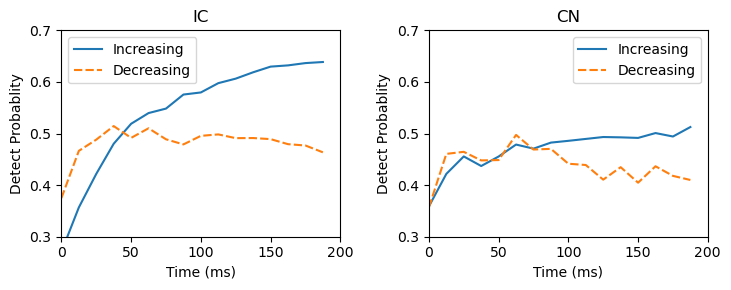

In [63]:
# 2 graphs IC, CN - both have increasing and decreasing mean lines with +-SE lines around them

plt.rcParams["figure.figsize"] = [7.50, 3.0]
plt.rcParams["figure.autolayout"] = True

fig, axes = plt.subplots(1, 2)
axes[0].set_xlim([0,200])
axes[0].set_ylim([.3,.7])
axes[0].set_xlabel('Time (ms)')
axes[0].set_ylabel('Detect Probablity')
axes[1].set_xlim([0,200])
axes[1].set_ylim([.3,.7])
axes[1].set_xlabel('Time (ms)')
axes[1].set_ylabel('Detect Probablity')

# IC Lines
axes[0].set_title('IC')
sns.lineplot(ax = axes[0],
             data = IC_graph_data
            )



# CN Histogram
axes[1].set_title('CN')
sns.lineplot(ax = axes[1],
             data = CN_graph_data
            )

plt.show()  